In [1]:
import numpy as np
f = open('resources/InsectWingbeatSound/InsectWingbeatSound_TEST','r')
data = f.read()
f.close()
# 개행문자 기준으로 끊어서 리스트로
data_list = data.split('\n')

# "," 기준으로 끊어서 리스트로
emptylist = []
for list_part in data_list:
    emptylist.append(list_part.split(","))

In [2]:
# str -> float 변환
tofloat = []
for partlist in emptylist:
    tofloat.append([float(i) for i in partlist]) 

In [3]:
labels = []
data_list = []
for datas in tofloat:
    labels.append(datas[0])
    data_list.append(datas[1:])
print(np.shape(labels))
print(np.shape(data_list))


(1980,)
(1980, 256)


In [4]:
from readFile import split_into_values, toRPdata
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

def Standard(data):
    SS = StandardScaler().fit(data)
    scaled = SS.transform(data)
    return scaled

def MinMax(data):
    MMS = MinMaxScaler().fit(data)
    scaled = MMS.transform(data)
    return scaled

# result_list transpose
result_T = [list(x) for x in zip(*data_list)]

# minmax 정규화
result_scaled = Standard(result_T)

# 다시 result transpose 해서 원래대로
result_scaled = [list(x) for x in zip(*result_scaled)]

result_ = np.array(result_scaled)

In [5]:
result_.shape

(1980, 256)

In [6]:
data = result_.reshape(result_.shape[0], 1, result_.shape[1])
X = toRPdata(data, threshold='point', percentage=30)
#X = toRPdata(data)
    
X_scaled = np.expand_dims(X, axis=3)
X_scaled.shape

(1980, 256, 256, 1)

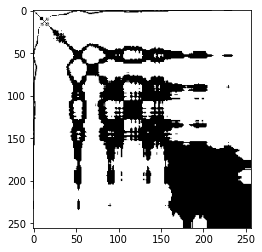

In [7]:
from matplotlib import pyplot as plt
plt.imshow(X[0], cmap='Greys')

In [8]:
learning_rate = 3e-5
optimizer='Adam'
loss='mse'
image_size = 256 #1024, 256
dimension = 4 # ...

In [9]:
from utils import split_data, normalization_tool
from agent import Autoencoder_Agent

X_train, X_test, Y_train, Y_test = split_data(X_scaled, X_scaled) #데이터 분리

autoencoder = Autoencoder_Agent(model_size=image_size, dimension=dimension, optimizer=optimizer,learning_rate=learning_rate)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 128)     1280      
_________________________________________________________________
activation (Activation)      (None, 256, 256, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      73792     
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        1

In [10]:
batch_size = 10
epochs = 5000

In [11]:
hist = autoencoder.train(X_train,batch_size,epochs,X_test)

Epoch 1/5000
149/149 [==============================] - ETA: 0s - loss: 0.6471
Epoch 00001: val_loss improved from inf to 0.61510, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 25s 171ms/step - loss: 0.6471 - val_loss: 0.6151
Epoch 2/5000
149/149 [==============================] - ETA: 0s - loss: 0.6075
Epoch 00002: val_loss improved from 0.61510 to 0.60571, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 24s 164ms/step - loss: 0.6075 - val_loss: 0.6057
Epoch 3/5000
149/149 [==============================] - ETA: 0s - loss: 0.6039
Epoch 00003: val_loss improved from 0.60571 to 0.60400, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 24s 163ms/step - loss: 0.6039 - val_loss: 0.6040
Epoch 4/5000
149/149 [==============================] - ETA: 0s - loss: 0.602 - ETA: 0s - loss: 0.6022
Epoch 00004: val_loss improved from 0.60400 to 0.60271, saving model to insectWing_dimension_4

Epoch 32/5000
149/149 [==============================] - ETA: 0s - loss: 0.5804
Epoch 00032: val_loss did not improve from 0.58488
149/149 [==============================] - 24s 162ms/step - loss: 0.5804 - val_loss: 0.5850
Epoch 33/5000
149/149 [==============================] - ETA: 0s - loss: 0.5804
Epoch 00033: val_loss improved from 0.58488 to 0.58475, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 24s 163ms/step - loss: 0.5804 - val_loss: 0.5848
Epoch 34/5000
149/149 [==============================] - ETA: 0s - loss: 0.5801
Epoch 00034: val_loss did not improve from 0.58475
149/149 [==============================] - 24s 162ms/step - loss: 0.5801 - val_loss: 0.5852
Epoch 35/5000
149/149 [==============================] - ETA: 0s - loss: 0.5799
Epoch 00035: val_loss did not improve from 0.58475
149/149 [==============================] - 25s 166ms/step - loss: 0.5799 - val_loss: 0.5852
Epoch 36/5000
149/149 [==============================] - ETA:

Epoch 67/5000
149/149 [==============================] - ETA: 0s - loss: 0.5764
Epoch 00067: val_loss did not improve from 0.58355
149/149 [==============================] - 24s 162ms/step - loss: 0.5764 - val_loss: 0.5838
Epoch 68/5000
149/149 [==============================] - ETA: 0s - loss: 0.5763
Epoch 00068: val_loss did not improve from 0.58355
149/149 [==============================] - 24s 162ms/step - loss: 0.5763 - val_loss: 0.5839
Epoch 69/5000
149/149 [==============================] - ETA: 0s - loss: 0.5762
Epoch 00069: val_loss did not improve from 0.58355
149/149 [==============================] - 24s 162ms/step - loss: 0.5762 - val_loss: 0.5840
Epoch 70/5000
149/149 [==============================] - ETA: 0s - loss: 0.5761
Epoch 00070: val_loss did not improve from 0.58355
149/149 [==============================] - 24s 162ms/step - loss: 0.5761 - val_loss: 0.5839
Epoch 71/5000
149/149 [==============================] - ETA: 0s - loss: 0.5760
Epoch 00071: val_loss did no

Epoch 104/5000
149/149 [==============================] - ETA: 0s - loss: 0.5737
Epoch 00104: val_loss did not improve from 0.58345
149/149 [==============================] - 24s 162ms/step - loss: 0.5737 - val_loss: 0.5838
Epoch 105/5000
149/149 [==============================] - ETA: 0s - loss: 0.5737
Epoch 00105: val_loss did not improve from 0.58345
149/149 [==============================] - 24s 162ms/step - loss: 0.5737 - val_loss: 0.5841
Epoch 106/5000
149/149 [==============================] - ETA: 0s - loss: 0.5735
Epoch 00106: val_loss did not improve from 0.58345
149/149 [==============================] - 24s 163ms/step - loss: 0.5735 - val_loss: 0.5842
Epoch 107/5000
149/149 [==============================] - ETA: 0s - loss: 0.5736
Epoch 00107: val_loss did not improve from 0.58345
149/149 [==============================] - 24s 162ms/step - loss: 0.5736 - val_loss: 0.5838
Epoch 108/5000
149/149 [==============================] - ETA: 0s - loss: 0.5735
Epoch 00108: val_loss d

Epoch 141/5000
149/149 [==============================] - ETA: 0s - loss: 0.5719
Epoch 00141: val_loss did not improve from 0.58345
149/149 [==============================] - 24s 162ms/step - loss: 0.5719 - val_loss: 0.5842
Epoch 142/5000
149/149 [==============================] - ETA: 0s - loss: 0.5719
Epoch 00142: val_loss did not improve from 0.58345
149/149 [==============================] - 24s 162ms/step - loss: 0.5719 - val_loss: 0.5839
Epoch 143/5000
149/149 [==============================] - ETA: 0s - loss: 0.5718
Epoch 00143: val_loss did not improve from 0.58345
149/149 [==============================] - 24s 162ms/step - loss: 0.5718 - val_loss: 0.5843
Epoch 144/5000
149/149 [==============================] - ETA: 0s - loss: 0.5718
Epoch 00144: val_loss did not improve from 0.58345
149/149 [==============================] - 24s 162ms/step - loss: 0.5718 - val_loss: 0.5843
Epoch 145/5000
149/149 [==============================] - ETA: 0s - loss: 0.5717
Epoch 00145: val_loss d

Epoch 178/5000
149/149 [==============================] - ETA: 0s - loss: 0.5706
Epoch 00178: val_loss did not improve from 0.58345
149/149 [==============================] - 24s 163ms/step - loss: 0.5706 - val_loss: 0.5848
Epoch 179/5000
149/149 [==============================] - ETA: 0s - loss: 0.5705
Epoch 00179: val_loss did not improve from 0.58345
149/149 [==============================] - 24s 162ms/step - loss: 0.5705 - val_loss: 0.5852
Epoch 180/5000
149/149 [==============================] - ETA: 0s - loss: 0.5705
Epoch 00180: val_loss did not improve from 0.58345
149/149 [==============================] - 24s 162ms/step - loss: 0.5705 - val_loss: 0.5851
Epoch 181/5000
149/149 [==============================] - ETA: 0s - loss: 0.5706
Epoch 00181: val_loss did not improve from 0.58345
149/149 [==============================] - 24s 162ms/step - loss: 0.5706 - val_loss: 0.5862
Epoch 182/5000
149/149 [==============================] - ETA: 0s - loss: 0.5704
Epoch 00182: val_loss d

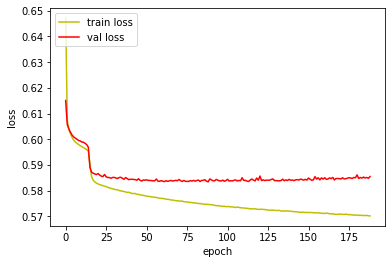

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()


loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
# loss_ax.plot([hist['loss'][i] - hist['val_loss'][i] for i in range(len(hist['loss']))], 'g', label='loss - val loss')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')

plt.show()

In [13]:
features = np.empty((0,4), float)
for i in range(66):
    features = np.append(features, autoencoder.feature_extract(X_scaled[i*30:(i+1)*30]), axis=0)

print(features.shape)

(1980, 4)


In [94]:
from sklearn.cluster import KMeans
result = KMeans(n_clusters=11).fit(features)
plotSilhouette(features,result)

0.22645597064637907


In [87]:
import sys
import numpy

numpy.set_printoptions(threshold=sys.maxsize)
print(result.labels_)

[ 7  4  0  0  2  0  5  4  9  6  7  9  2  5  4  4  4  0  9 10  5  2 10 10
  4  6  4  5  5  6  4  6  0  6  6  6  8  5  0  5  3  4  8  0  4  6  0  4
  4  2  0  0  5  3 10  4  6  6  4  0  2  6  4  7  4  3  8  6  3  0  7  3
  6  7  4  6  8  9  0 10  4 10  4  6  0  7  4  4  5  6  2  4  4  2  0  5
  0  7  0  3  4  0  7  7  4  6  0  0  4  5  0  2  8  6  6  4  6  3  8  4
  6  6  3  2  7  0  0  7  0  4  7  4  1  5  3  0  6  7  5  6  3  4  6  7
  5  2  4  8  0  0  4  4  4  6  3  0 10  4  5  0  4  4  0  7  4  6  9 10
  3  7  2  7  0  6  4  4  0  5  1 10  4  4  6  5  4  8  2  5  3  5  5  4
  3  0  5  6  2  2  5  8  0 10  4  7  4  3  2  6  4  4  5  1  5  5  0 10
  7  4  0  4  5  6  3  1  4  5 10  7  4  1  9  9  4  7  2  2  4  2  5 10
  0  6  0  8  3  7  5  7  4  4  5  4  0  2  4  7  5  4  2  0  1  5  2  7
  7  9  4  3  4  6  8  1  4  2  7  5  0  0 10  4  5  4  4  4  4  4  0  5
  3 10  4  5  4  6  4  5  4  4  4  0  4  4  9 10  4  3  0  0  0  5  4  6
  0  7  4  4  6  6  4  4  4  4  2  4  3  3  7  3  6

In [15]:
import numpy as np
from sklearn.metrics import silhouette_samples,silhouette_score
from matplotlib import cm

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km.labels_)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_score(X, y_km.labels_,metric='euclidean')
    print(silhouette_vals)
#     y_ax_lower, y_ax_upper = 0,0
#     yticks = []
    
#     for i , c in enumerate(cluster_labels):
#         c_silhouette_vals = silhouette_vals[y_km.labels_ == c]
#         c_silhouette_vals.sort()
#         y_ax_upper += len(c_silhouette_vals)
#         color = cm.jet(i/n_clusters)
        
#         plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,edgecolor='none', color=color)
#         yticks.append((y_ax_lower + y_ax_upper)/2)
#         y_ax_lower += len(c_silhouette_vals)
    
#     silhouette_avg = np.mean(silhouette_vals)
#     plt.axvline(silhouette_avg, color='red', linestyle='--')
#     plt.yticks(yticks, cluster_labels+1)
#     plt.ylabel('cluster')
#     plt.xlabel('silhouette score')
#     plt.show()

0.2279039883123083


In [27]:
autoencoder.save("insect_128_8_mse.h5")